# **Investment Analysis**
## -Submitted by Rajeev Agarwal 

# Checkpoint 1: Data Cleaning 1


### Load companies.csv into companies data frame. Use 'iso-8859-1' encoding to read the csv file. 

In [1]:
import numpy as np
import pandas as pd

companies = pd.read_csv('./companies.txt',encoding='iso-8859-1',delimiter='\t')
companies.head()


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [2]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Silk,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


### Load rounds2.csv into rounds data frame. Use 'iso-8859-1' encoding to read the csv file.

In [3]:
rounds2 = pd.read_csv('./rounds2.csv',encoding='iso-8859-1')
rounds2.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Remove rows with null company values from the rounds2 and companies data frame

In [4]:
#Remove rows with null company_permalink values from the rounds2 data frame
rounds2 = rounds2[pd.notnull(rounds2['company_permalink'])]
rounds2.shape


(114949, 6)

In [5]:
#Remove rows with null permalink values from the companies data frame
companies = companies[pd.notnull(companies['permalink'])]
companies.shape

(66368, 10)

### Remove non-ascii characters from companies.permalink and rounds2.company_permalink values

In [6]:
companies.permalink.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
rounds2.company_permalink.replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)

### Change companies.permalink and rounds2.company_permalink values to upper case

In [7]:
companies.permalink = companies.permalink.apply(lambda x : x.upper())
rounds2.company_permalink = rounds2.company_permalink.apply(lambda x : x.upper())

### How many unique companies are present in rounds2?

In [8]:
#Groupby rounds2.company_permalink to remove the duplicates. len function will show the number of rows

len(rounds2.groupby(rounds2.company_permalink).company_permalink)

#66368

66368

### How many unique companies are present in the companies file?

In [9]:
#Groupby companies.permalink to remove the duplicates. len function will show the number of rows

len(companies.groupby(companies.permalink).permalink)

#66368

66368

### Merge the two data frames so that all  variables (columns)  in the companies data frame are added to the rounds2 data frame. Name the merged frame master_frame.

In [10]:
master_frame = pd.merge(rounds2, companies,how='inner',left_on='company_permalink',right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


### How many observations are present in master_frame?

In [11]:
master_frame.count()

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
permalink                  114949
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

In [12]:
len(master_frame.groupby(master_frame.permalink).permalink)

#66368

66368

# Checkpoint 2: Funding Type Analysis

### Remove rows with null raised_amount_usd value from the dataframe

In [13]:
#Remove rows with null raised_amount_usd value from the dataframe

master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/ORGANIZATION/-QOUNTER,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
6,/ORGANIZATION/01GAMES-TECHNOLOGY,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,01-07-2014,41250.0,/ORGANIZATION/01GAMES-TECHNOLOGY,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN


In [14]:
master_frame.count()

company_permalink          94959
funding_round_permalink    94959
funding_round_type         94959
funding_round_code         28169
funded_at                  94959
raised_amount_usd          94959
permalink                  94959
name                       94958
homepage_url               90627
category_list              93915
status                     94959
country_code               89108
state_code                 87355
region                     87911
city                       87914
founded_at                 78993
dtype: int64

### Calculate the most representative value (mean) of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

In [15]:
#Change the display of floating point numbers to two decimal values
pd.options.display.float_format = '{:.2f}'.format

#Group master_frame by funding_round_type and get the mean value of raised_amount_usd for each group
avg_investment_series = master_frame.groupby('funding_round_type').raised_amount_usd.mean().sort_values(ascending = False)
avg_investment_series

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719818.00
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

### Find mean investment amount for seed,venture,angel and private_equity investment types 

In [17]:
#Find mean investment amount for seed,venture,angel and private_equity investment types 
avg_investment_series = avg_investment_series[['seed','venture','angel','private_equity']].sort_values(ascending = False)
avg_investment_series

funding_round_type
private_equity   73308593.03
venture          11748949.13
angel              958694.47
seed               719818.00
Name: raised_amount_usd, dtype: float64

### Find the investment type which has average investment per round between 5 to 15 Million. This will be the most suitable investment type for Spark Funds

In [19]:
#Find the investment type which has average investement per round between 5 to 15 Million
avg_investment_series.loc[lambda x: (x>=5000000) & (x<=15000000)]

#Answer - venture 

funding_round_type
venture   11748949.13
Name: raised_amount_usd, dtype: float64

### Plot#1 for Checkpoint 6 - A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

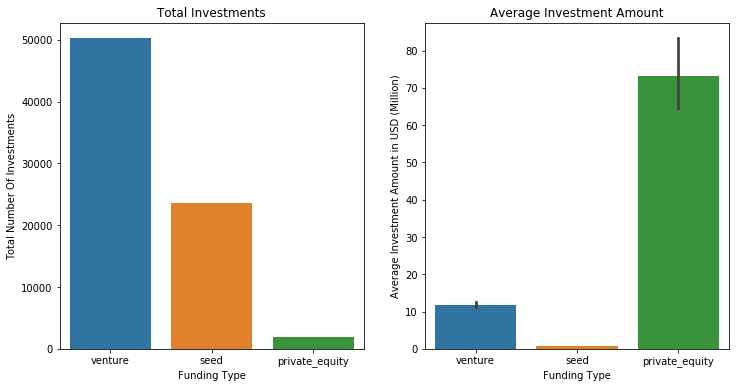

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# subplot 1: statistic=count
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', estimator=lambda x: len(x),
            data=master_frame[(master_frame.funding_round_type=='venture')|(master_frame.funding_round_type=='seed')
                              | (master_frame.funding_round_type=='private_equity')])
plt.ylabel('Total Number Of Investments')
plt.xlabel('Funding Type')
plt.title("Total Investments")

master_frame['raised_amount_million'] = master_frame['raised_amount_usd']/1000000
# subplot 2: statistic=mean
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_million', estimator=np.mean,
            data=master_frame[(master_frame.funding_round_type=='venture')|(master_frame.funding_round_type=='seed')
                              | (master_frame.funding_round_type=='private_equity')])
plt.ylabel('Average Investment Amount in USD (Million)')
plt.xlabel('Funding Type')
plt.title("Average Investment Amount")

plt.show()

### Filter master_frame data so it only contains the chosen investment type - venture

In [22]:
#Filter rows where funding_round_type = venture

master_frame = master_frame[master_frame.funding_round_type == 'venture']
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_million
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3.41
4,/ORGANIZATION/0-6-COM,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,2.00
8,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.00,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,0.72
10,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,20.00


# Checkpoint 3: Country Analysis

### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

#### For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [23]:
#create a pivot table top9 to group the master_frame on country_code
#For venture investment type, sort the countries in the descending order of total funding received
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by='raised_amount_usd',ascending=False)

#For venture investment type, top nine countries based on the total investment amount each country has received
top9 = top9.iloc[:9,]

#Convert the series top9 to a data frame
top9['country_code'] = top9.index
top9.index = range(9)
print(top9)

   raised_amount_usd country_code
0    422510842796.00          USA
1     39835418773.00          CHN
2     20245627416.00          GBR
3     14391858718.00          IND
4      9583332317.00          CAN
5      7259536732.00          FRA
6      6907514579.00          ISR
7      6346959822.00          DEU
8      3363676611.00          JPN


### From top9 data frame -
#### Top English speaking country - USA
#### Second English speaking country - GBR
#### Third English speaking country - IND

### Plot#2 for Checkpoint 6 - A plot showing the top 9 countries against the total amount of investments of funding type venture. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

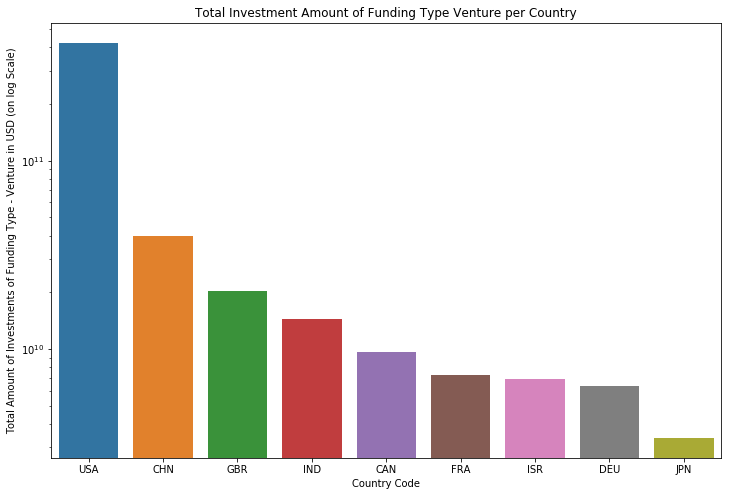

In [24]:
plt.figure(figsize=(12, 8))

#Create a barplot with x axis = 'country_code' and y axis = 'raised_amount_usd'
sns.barplot(x='country_code', y='raised_amount_usd', data=top9)
plt.ylabel('Total Amount of Investments of Funding Type - Venture in USD (on log Scale)')
plt.yscale('log')
plt.xlabel('Country Code')
plt.title("Total Investment Amount of Funding Type Venture per Country")
plt.show()

# Checkpoint 4: Sector Analysis 1

### Read the mapping.csv file into mapping data frame

In [25]:
#Create the mapping data frame and remove the rows with null catergory_list values
mapping = pd.read_csv('./mapping.csv')
mapping = mapping[~ pd.isnull(mapping.category_list)]

#Change the category_list values to upper case 
mapping['category_list'] = mapping['category_list'].apply(lambda x : x.upper())
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D PRINTING,0,0,0,0,0,1,0,0,0
3,3D TECHNOLOGY,0,0,0,0,0,1,0,0,0
4,ACCOUNTING,0,0,0,0,0,0,0,0,1
5,ACTIVE LIFESTYLE,0,0,0,0,1,0,0,0,0


### Remove rows from the companies dataframe which have null category_list value

In [26]:
#Remove rows from the companies dataframe which have null category_list value
companies = companies[~ pd.isnull(companies.category_list)]
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [27]:
companies.count()

permalink        63220
name             63219
homepage_url     59074
category_list    63220
status           63220
country_code     57804
state_code       56268
region           56765
city             56767
founded_at       49711
dtype: int64

### Extract the primary sector of each category list from the category_list column

In [28]:
#Create a new column primary_sector for the primary sector of the companies.
#Split category_list value on vertical bar '|' and take the firt string befor the vertical bar as the primary_sector
companies['primary_sector'] = companies['category_list'].apply(lambda x : x.split('|')[0].strip().upper())
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,MEDIA
1,/ORGANIZATION/-QOUNTER,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,APPLICATION PLATFORMS
2,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,APPS
3,/ORGANIZATION/0-6-COM,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,CURATED WEB
4,/ORGANIZATION/004-TECHNOLOGIES,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,SOFTWARE


### Merge mapping data frame in companies data frame

In [29]:

companies = pd.merge(companies, mapping, left_on = 'primary_sector', right_on = 'category_list')
companies.head()

,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,...,category_list_y,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,...,MEDIA,0,0,0,1,0,0,0,0,0
1,/ORGANIZATION/90MIN,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,...,MEDIA,0,0,0,1,0,0,0,0,0
2,/ORGANIZATION/A-B-PRODUCTIONS,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,...,MEDIA,0,0,0,1,0,0,0,0,0
3,/ORGANIZATION/A-DANCE-FOR-ME,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,...,MEDIA,0,0,0,1,0,0,0,0,0
4,/ORGANIZATION/ACE-FILM-PRODUCTIONS,ACE Film Productions,NaN,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,...,MEDIA,0,0,0,1,0,0,0,0,0


In [30]:
companies.count()

permalink                                  58891
name                                       58890
homepage_url                               54956
category_list_x                            58891
status                                     58891
country_code                               53788
state_code                                 52362
region                                     52798
city                                       52800
founded_at                                 46099
primary_sector                             58891
category_list_y                            58891
Automotive & Sports                        58891
Blanks                                     58891
Cleantech / Semiconductors                 58891
Entertainment                              58891
Health                                     58891
Manufacturing                              58891
News, Search and Messaging                 58891
Others                                     58891
Social, Finance, Ana

### Select the companies rows which belong to one of the eight primary sectors (Remove the rows where sector is Blanks)

In [31]:
#Select the companies rows which belong to one of the eight primary sectors (Remove the rows where sector is Blanks)
companies = companies[~(companies['Blanks'] == 1)]

In [32]:
companies.count()

permalink                                  58891
name                                       58890
homepage_url                               54956
category_list_x                            58891
status                                     58891
country_code                               53788
state_code                                 52362
region                                     52798
city                                       52800
founded_at                                 46099
primary_sector                             58891
category_list_y                            58891
Automotive & Sports                        58891
Blanks                                     58891
Cleantech / Semiconductors                 58891
Entertainment                              58891
Health                                     58891
Manufacturing                              58891
News, Search and Messaging                 58891
Others                                     58891
Social, Finance, Ana

### Convert wide to long data format using pd.melt(). Eight main sectors should be converted into a single column - 'main_sector' 

In [33]:
companies = pd.melt(companies, 
        id_vars=['permalink', 'name', 'country_code', 'primary_sector' ], 
        value_vars=['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 
                   'Health', 'Manufacturing', 'News, Search and Messaging', 'Others',
                   'Social, Finance, Analytics, Advertising'])

companies.head()

,permalink,name,country_code,primary_sector,variable,value
0,/ORGANIZATION/-FAME,#fame,IND,MEDIA,Automotive & Sports,0
1,/ORGANIZATION/90MIN,90min,GBR,MEDIA,Automotive & Sports,0
2,/ORGANIZATION/A-B-PRODUCTIONS,A.B Productions,USA,MEDIA,Automotive & Sports,0
3,/ORGANIZATION/A-DANCE-FOR-ME,A Dance for Me,USA,MEDIA,Automotive & Sports,0
4,/ORGANIZATION/ACE-FILM-PRODUCTIONS,ACE Film Productions,USA,MEDIA,Automotive & Sports,0


### Remove rows where value column = 0

In [34]:
companies = companies[~(companies['value'] == 0)]
companies.count()

permalink         58891
name              58890
country_code      53788
primary_sector    58891
variable          58891
value             58891
dtype: int64

In [35]:
#Rename variable column name as 'main_sector'
companies = companies.rename(columns={'variable': 'main_sector'})

#Drop value column as we no longer need it
companies = companies.drop(columns=['value'], axis = 1)
companies.head()

,permalink,name,country_code,primary_sector,main_sector
28879,/ORGANIZATION/12-STAR-SURVIVAL,12 Star Survival,DNK,SPORTS,Automotive & Sports
28880,/ORGANIZATION/120-SPORTS,120 Sports,USA,SPORTS,Automotive & Sports
28881,/ORGANIZATION/24-HOUR-PRO-MUSCLE-GYM,24 Hour Pro Muscle Gym,USA,SPORTS,Automotive & Sports
28882,/ORGANIZATION/5-STAR-QUARTERBACK,5 Star Quarterback,USA,SPORTS,Automotive & Sports
28883,/ORGANIZATION/8PACKS,8packs,SGP,SPORTS,Automotive & Sports


In [36]:
#Count rows for each main_sector 
companies.groupby('main_sector').count()

,permalink,name,country_code,primary_sector
main_sector,,,,
Automotive & Sports,1637,1637,1489,1637
Cleantech / Semiconductors,7461,7461,7085,7461
Entertainment,5402,5402,4780,5402
Health,4716,4716,4367,4716
Manufacturing,4270,4270,3897,4270
"News, Search and Messaging",9341,9341,8246,9341
Others,15170,15169,13989,15170
"Social, Finance, Analytics, Advertising",10894,10894,9935,10894


# Checkpoint 5: Sector Analysis 2

### Filter master_frame rows where raised_amount_usd is between 5 and 15 Million

In [37]:
#Filter rows where raised_amount_usd is between 5 to 15 Million

master_frame = master_frame[(master_frame.raised_amount_usd >= 5000000) & (master_frame.raised_amount_usd<=15000000)]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_million
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.00
12,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.00,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,8.90
22,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,5.00
46,/ORGANIZATION/1001-MENUS,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.00,/ORGANIZATION/1001-MENUS,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,6.60
50,/ORGANIZATION/1001PHARMACIES-COM,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.00,/ORGANIZATION/1001PHARMACIES-COM,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,8.90


### Plot#3 for Checkpoint 6 - A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type venture). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.



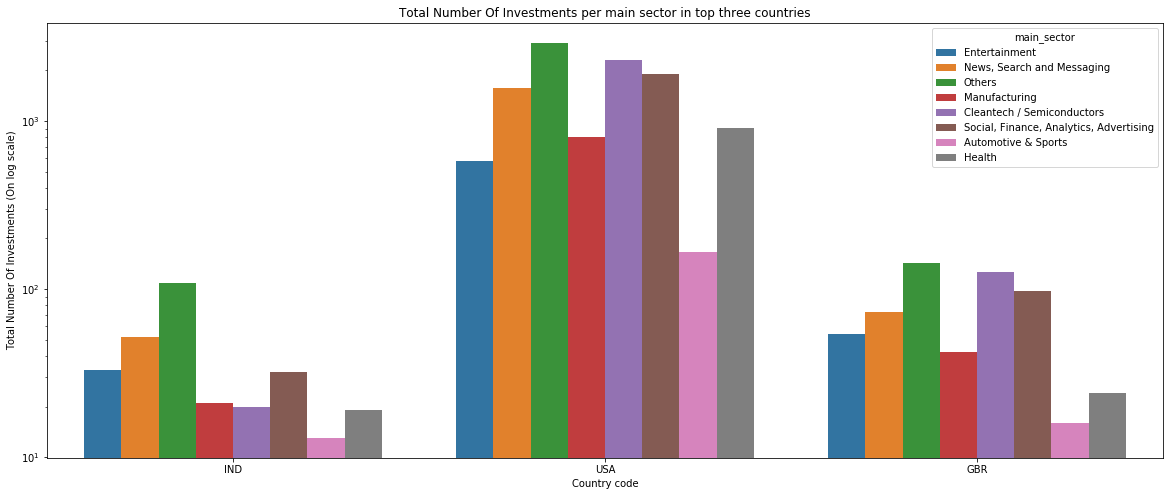

In [38]:
DF_plot3 = pd.merge(master_frame, companies[['permalink','main_sector']], on='permalink',how='inner')

plt.figure(figsize=(20, 8))

#statistic=count
sns.barplot(x='country_code', y='raised_amount_million', hue='main_sector',estimator=lambda x: len(x),
            data=DF_plot3[(DF_plot3.country_code == 'USA')|
                          (DF_plot3.country_code == 'GBR')|(DF_plot3.country_code == 'IND')])
plt.ylabel('Total Number Of Investments (On log scale)')
plt.yscale('log')
plt.xlabel('Country code')
plt.title("Total Number Of Investments per main sector in top three countries")
plt.show()

### Create data frame D by merging master_frame and companies data frames

### All the columns of the master_frame along with the primary sector and the main sector

In [39]:
D=None
D = pd.merge(master_frame, companies[['permalink','main_sector','primary_sector']], on='permalink',how='inner')
D.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,raised_amount_million,main_sector,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,10.00,Entertainment,MEDIA
1,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.00,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,5.00,"News, Search and Messaging",APPS
2,/ORGANIZATION/1001-MENUS,/funding-round/645b4cd895450b8e0268027cd7813047,venture,B,04-11-2015,6602694.00,/ORGANIZATION/1001-MENUS,ZenChef,http://zenchef.com/en/,Local Businesses|Restaurants,operating,FRA,A8,Paris,Paris,20-11-2010,6.60,Others,LOCAL BUSINESSES
3,/ORGANIZATION/1001PHARMACIES-COM,/funding-round/a21fc4d20200f43e3a25fd9cfc7c1482,venture,A,09-07-2015,8900000.00,/ORGANIZATION/1001PHARMACIES-COM,1001pharmacies.com,http://www.1001pharmacies.com/,Cosmetics|Marketplaces,operating,FRA,A9,Montpellier,Montpellier,01-01-2012,8.90,Health,COSMETICS
4,/ORGANIZATION/1006-TV,/funding-round/b6aeb7401ec6993f92a16cbca153b600,venture,B,31-07-2014,10000000.00,/ORGANIZATION/1006-TV,1006.tv,http://www.1006.tv/,Games|Media,operating,CHN,22,Beijing,Beijing,01-01-2009,10.00,Entertainment,GAMES


## Create dataframe D1 - for the top english speaking country - USA

### The total number (or count) of investments for each main sector in a separate column

In [40]:
D1 = pd.pivot_table(data=D[D.country_code == 'USA'],index='main_sector', values='funding_round_permalink', aggfunc='count')
D1 = D1.sort_values(by='funding_round_permalink', ascending=False)
D1 = D1.rename(columns={'funding_round_permalink': 'count_investments'})

#Change index of the data frame
D1['main_sector'] = D1.index
D1.index = range(8)
D1

,count_investments,main_sector
0,2923,Others
1,2297,Cleantech / Semiconductors
2,1912,"Social, Finance, Analytics, Advertising"
3,1563,"News, Search and Messaging"
4,908,Health
5,799,Manufacturing
6,580,Entertainment
7,167,Automotive & Sports


### Create data frame D1_total_investments with the total amount invested in each main sector in a separate column

In [41]:
D1_total_investments = pd.pivot_table(data=D[D.country_code == 'USA'],index='main_sector', values='raised_amount_usd',
                                     aggfunc='sum')
D1_total_investments = D1_total_investments.rename(columns={'raised_amount_usd': 'sum_investments'})

#Change index of the data frame
D1_total_investments['main_sector'] = D1_total_investments.index
D1_total_investments.index = range(8)

D1_total_investments

,sum_investments,main_sector
0,1454104361.00,Automotive & Sports
1,21181003033.00,Cleantech / Semiconductors
2,5000212982.00,Entertainment
3,8200859357.00,Health
4,7258553378.00,Manufacturing
5,13796816094.00,"News, Search and Messaging"
6,26089280296.00,Others
7,16680695048.00,"Social, Finance, Analytics, Advertising"


### Merge data frame D1_total_investments into data frame D1

In [42]:
D1 = pd.merge(D1,D1_total_investments, on='main_sector',how='inner')

#Change the position of columns of D1
D1 = D1[['main_sector','count_investments','sum_investments']]

#Sort D1 by count_investments in descending order
D1.sort_values(by='count_investments',ascending=False)

D1

,main_sector,count_investments,sum_investments
0,Others,2923,26089280296.00
1,Cleantech / Semiconductors,2297,21181003033.00
2,"Social, Finance, Analytics, Advertising",1912,16680695048.00
3,"News, Search and Messaging",1563,13796816094.00
4,Health,908,8200859357.00
5,Manufacturing,799,7258553378.00
6,Entertainment,580,5000212982.00
7,Automotive & Sports,167,1454104361.00


## Create dataframe D2 - for the second english speaking country - GBR

### The total number (or count) of investments for each main sector in a separate column

In [43]:
D2 = pd.pivot_table(data=D[D.country_code == 'GBR'],index='main_sector', values='funding_round_permalink', aggfunc='count')
D2 = D2.sort_values(by='funding_round_permalink', ascending=False)
D2 = D2.rename(columns={'funding_round_permalink': 'count_investments'})

#Change index of the data frame
D2['main_sector'] = D2.index
D2.index = range(8)
D2

,count_investments,main_sector
0,143,Others
1,127,Cleantech / Semiconductors
2,98,"Social, Finance, Analytics, Advertising"
3,73,"News, Search and Messaging"
4,54,Entertainment
5,42,Manufacturing
6,24,Health
7,16,Automotive & Sports


### Create data frame D2_total_investments with the total amount invested in each main sector in a separate column

In [44]:
D2_total_investments = pd.pivot_table(data=D[D.country_code == 'GBR'],index='main_sector', values='raised_amount_usd',
                                     aggfunc='sum')
D2_total_investments = D2_total_investments.rename(columns={'raised_amount_usd': 'sum_investments'})

#Change index of the data frame
D2_total_investments['main_sector'] = D2_total_investments.index
D2_total_investments.index = range(8)

D2_total_investments

,sum_investments,main_sector
0,167051565.00,Automotive & Sports
1,1136905008.00,Cleantech / Semiconductors
2,461511059.00,Entertainment
3,214537510.00,Health
4,361940335.00,Manufacturing
5,615746235.00,"News, Search and Messaging"
6,1249124289.00,Others
7,821888357.00,"Social, Finance, Analytics, Advertising"


### Merge data frame D2_total_investments into data frame D2

In [45]:
D2 = pd.merge(D2,D2_total_investments, on='main_sector',how='inner')

#Change the position of columns of D2
D2 = D2[['main_sector','count_investments','sum_investments']]

#Sort D2 by count_investments in descending order
D2.sort_values(by='count_investments',ascending=False)
D2

,main_sector,count_investments,sum_investments
0,Others,143,1249124289.00
1,Cleantech / Semiconductors,127,1136905008.00
2,"Social, Finance, Analytics, Advertising",98,821888357.00
3,"News, Search and Messaging",73,615746235.00
4,Entertainment,54,461511059.00
5,Manufacturing,42,361940335.00
6,Health,24,214537510.00
7,Automotive & Sports,16,167051565.00


## Create dataframe D3 - for the third english speaking country - IND

### The total number (or count) of investments for each main sector in a separate column


In [46]:
D3 = pd.pivot_table(data=D[D.country_code == 'IND'],index='main_sector', values='funding_round_permalink', aggfunc='count')
D3 = D3.sort_values(by='funding_round_permalink', ascending=False)
D3 = D3.rename(columns={'funding_round_permalink': 'count_investments'})

#Change index of the data frame
D3['main_sector'] = D3.index
D3.index = range(8)
D3

,count_investments,main_sector
0,109,Others
1,52,"News, Search and Messaging"
2,33,Entertainment
3,32,"Social, Finance, Analytics, Advertising"
4,21,Manufacturing
5,20,Cleantech / Semiconductors
6,19,Health
7,13,Automotive & Sports


### Create data frame D3_total_investments with the total amount invested in each main sector in a separate column

In [47]:
D3_total_investments = pd.pivot_table(data=D[D.country_code == 'IND'],index='main_sector', values='raised_amount_usd',
                                     aggfunc='sum')
D3_total_investments = D3_total_investments.rename(columns={'raised_amount_usd': 'sum_investments'})

#Change index of the data frame
D3_total_investments['main_sector'] = D3_total_investments.index
D3_total_investments.index = range(8)

D3_total_investments

,sum_investments,main_sector
0,136900000.00,Automotive & Sports
1,165380000.00,Cleantech / Semiconductors
2,280830000.00,Entertainment
3,167740000.00,Health
4,200900000.00,Manufacturing
5,433834545.00,"News, Search and Messaging"
6,1007409507.00,Others
7,290543500.00,"Social, Finance, Analytics, Advertising"


### Merge data frame D3_total_investments into data frame D3


In [48]:
D3 = pd.merge(D3,D3_total_investments, on='main_sector',how='inner')

#Change the position of columns of D3
D3 = D3[['main_sector','count_investments','sum_investments']]

#Sort D3 by count_investments in descending order
D3.sort_values(by='count_investments',ascending=False)

D3

,main_sector,count_investments,sum_investments
0,Others,109,1007409507.00
1,"News, Search and Messaging",52,433834545.00
2,Entertainment,33,280830000.00
3,"Social, Finance, Analytics, Advertising",32,290543500.00
4,Manufacturing,21,200900000.00
5,Cleantech / Semiconductors,20,165380000.00
6,Health,19,167740000.00
7,Automotive & Sports,13,136900000.00


### Total number of Investments (count)

In [49]:
#Total number of Investments (count)
#Country USA - D1
print('USA: ',D1.count_investments.sum())

#Country GBR - D2
print('GBR: ',D2.count_investments.sum())

#Country IND - D3
print('IND: ',D3.count_investments.sum())


USA:  11149
GBR:  577
IND:  299


### Total amount of investment (USD)

In [50]:
#Total amount of investment (USD)
#Country USA - D1
print('USA: ',D1.sum_investments.sum())

#Country GBR - D2
print('GBR: ',D2.sum_investments.sum())

#Country IND - D3
print('IND: ',D3.sum_investments.sum())


USA:  99661524549.0
GBR:  5028704358.0
IND:  2683537552.0


### Top Sector name (no. of investment-wise)

In [51]:
#Top Sector name (no. of investment-wise)
#Country USA - D1
print('USA: ',D1.loc[0,'main_sector'])

#Country GBR - D2
print('GBR: ',D2.loc[0,'main_sector'])

#Country IND - D3
print('IND: ',D3.loc[0,'main_sector'])


USA:  Others
GBR:  Others
IND:  Others


### Second Sector name (no. of investment-wise)

In [52]:
#Second Sector name (no. of investment-wise)
#Country USA - D1
print('USA: ',D1.loc[1,'main_sector'])

#Country GBR - D2
print('GBR: ',D2.loc[1,'main_sector'])

#Country IND - D3
print('IND: ',D3.loc[1,'main_sector'])


USA:  Cleantech / Semiconductors
GBR:  Cleantech / Semiconductors
IND:  News, Search and Messaging


### Third Sector name (no. of investment-wise)

In [53]:
#Third Sector name (no. of investment-wise)
#Country USA - D1
print('USA: ',D1.loc[2,'main_sector'])

#Country GBR - D2
print('GBR: ',D2.loc[2,'main_sector'])

#Country IND - D3
print('IND: ',D3.loc[2,'main_sector'])


USA:  Social, Finance, Analytics, Advertising
GBR:  Social, Finance, Analytics, Advertising
IND:  Entertainment


### Number of investments in top sector

In [54]:
#Number of investments in top sector
#Country USA - D1
print('USA: ',D1.loc[0,'count_investments'])

#Country GBR - D2
print('GBR: ',D2.loc[0,'count_investments'])

#Country IND - D3
print('IND: ',D3.loc[0,'count_investments'])


USA:  2923
GBR:  143
IND:  109


### Number of investments in second sector

In [55]:
#Number of investments in second sector
#Country USA - D1
print('USA: ',D1.loc[1,'count_investments'])

#Country GBR - D2
print('GBR: ',D2.loc[1,'count_investments'])

#Country IND - D3
print('IND: ',D3.loc[1,'count_investments'])


USA:  2297
GBR:  127
IND:  52


### Number of investments in third sector 

In [56]:
#Number of investments in third sector
#Country USA - D1
print('USA: ',D1.loc[2,'count_investments'])

#Country GBR - D2
print('GBR: ',D2.loc[2,'count_investments'])

#Country IND - D3
print('IND: ',D3.loc[2,'count_investments'])


USA:  1912
GBR:  98
IND:  33


### For the top sector count-wise ('Others') in USA, which company received the highest investment?

In [57]:
#For the top sector count-wise ('Others') in USA, which company received the highest investment?
pd.pivot_table(data=D[(D.country_code=='USA')&(D.main_sector=='Others')],index=['permalink','name'],
               values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head()

#Answer - Virtustream

,,raised_amount_usd
permalink,name,
/ORGANIZATION/VIRTUSTREAM,Virtustream,64300000.00
/ORGANIZATION/CAPELLA,Capella Photonics,54968051.00
/ORGANIZATION/AIRTIGHT-NETWORKS,AirTight Networks,54201907.00
/ORGANIZATION/DECARTA,deCarta,52100000.00
/ORGANIZATION/BLACK-DUCK-SOFTWARE,Black Duck Software,51000000.00


### For the top sector count-wise ('Others') in GBR, which company received the highest investment?

In [58]:
#For the top sector count-wise ('Others') in GBR, which company received the highest investment?
pd.pivot_table(data=D[(D.country_code=='GBR')&(D.main_sector=='Others')],index=['permalink','name'],
               values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head()

#Answer - Electric Cloud

,,raised_amount_usd
permalink,name,
/ORGANIZATION/ELECTRIC-CLOUD,Electric Cloud,37000000.00
/ORGANIZATION/SENSAGE,SenSage,36250000.00
/ORGANIZATION/ENIGMATIC,Enigmatec,32500000.00
/ORGANIZATION/SILVERRAIL-TECHNOLOGIES,SilverRail Technologies,29000000.00
/ORGANIZATION/OPENCLOUD,OpenCloud,27972766.00


### For the top sector count-wise ('Others') in IND, which company received the highest investment?

In [59]:
#For the top sector count-wise ('Others') in IND, which company received the highest investment?
pd.pivot_table(data=D[(D.country_code=='IND')&(D.main_sector=='Others')],index=['permalink','name'],
               values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head()

#Answer - FirstCry.com

,,raised_amount_usd
permalink,name,
/ORGANIZATION/FIRSTCRY-COM,FirstCry.com,39000000.00
/ORGANIZATION/MYNTRA,Myntra,38000000.00
/ORGANIZATION/COMMONFLOOR,CommonFloor,32900000.00
/ORGANIZATION/PEPPERFRY-COM,Pepperfry.com,28000000.00
/ORGANIZATION/ITZCASH-CARD-LTD,ItzCash Card Ltd.,25000000.00


### For the second best sector count-wise ('Cleantech / Semiconductors') in USA, which company received the highest investment?

In [60]:
#For the top sector count-wise ('Cleantech / Semiconductors') in USA, which company received the highest investment?
pd.pivot_table(data=D[(D.country_code=='USA')&(D.main_sector=='Cleantech / Semiconductors')],index=['permalink','name'],
               values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head()

#Answer - Biodesix

,,raised_amount_usd
permalink,name,
/ORGANIZATION/BIODESIX,Biodesix,75300000.00
/ORGANIZATION/TIGO-ENERGY,Tigo Energy,68739496.00
/ORGANIZATION/FORSIGHT-LABS,ForSight Labs,61300001.00
/ORGANIZATION/RHEONIX,Rheonix,56124758.00
/ORGANIZATION/SCIENERGY,SCIenergy,55375423.00


### For the second best sector count-wise ('Cleantech / Semiconductors') in GBR, which company received the highest investment?

In [61]:
#For the top sector count-wise ('Cleantech / Semiconductors') in GBR, which company received the highest investment?
pd.pivot_table(data=D[(D.country_code=='GBR')&(D.main_sector=='Cleantech / Semiconductors')],index=['permalink','name'],
               values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head()

#Answer - EUSA Pharma

,,raised_amount_usd
permalink,name,
/ORGANIZATION/EUSA-PHARMA,EUSA Pharma,35600000.00
/ORGANIZATION/HORIZON-DISCOVERY,Horizon Discovery,31353719.00
/ORGANIZATION/F-STAR-BIOTECHNOLOGISCHE-FORSCHUNGS-UND-ENTWICKLUNGSGES-M-B-H,F-star Biotechnology Limited,29132906.00
/ORGANIZATION/ELIXENT,Elixent,25000000.00
/ORGANIZATION/TAKEDA-CAMBRIDGE,Takeda Cambridge,22340000.00


### For the second best sector count-wise ('News, Search and Messaging') in IND, which company received the highest investment?

In [62]:
#For the top sector count-wise ('News, Search and Messaging') in IND, which company received the highest investment?
pd.pivot_table(data=D[(D.country_code=='IND')&(D.main_sector=='News, Search and Messaging')],index=['permalink','name'],
               values='raised_amount_usd',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False).head()

#Answer - GupShup

,,raised_amount_usd
permalink,name,
/ORGANIZATION/GUPSHUP-TECHNOLOGY-INDIA-PVT-LTD,GupShup,33000000.00
/ORGANIZATION/IMIMOBILE,IMImobile,23000000.00
/ORGANIZATION/SMS-GUPSHUP,SMS GupShup,22000000.00
/ORGANIZATION/ROADRUNNR,Roadrunnr,21000000.00
/ORGANIZATION/HIKE,hike,21000000.00


# Checkpoint 6: Plots

### All three plots have been drawn above in previous checkpoints.

#### Plot#1 has been drawn in checkpoint 2 analysis.
#### Plot#2 has been drawn in checkpoint 3 analysis.
#### Plot#3 has been drawn in checkpoint 5 analysis.